# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**План действий для выполнения поставленной задачи:**<br>
[1. Открыть файл с данными и изучить общую информацию](#1) <br><br>
[2. Провести предобработку данных:](#2)
  - определить и изучить пропущенные значения:
    + заполнить пропуски там, где возможно предположить логическую замену;
    + предположить причины, которые могли привести к пропускам в данных;
  - привести данные к нужным типам:
    + пояснить в каких столбцах нужно заменить тип данных и почему
    
[3. Посчитать и добавить в таблицу:](#3)
  - цену квадратного метра;
  - день недели, месяц и год публикации объявления;
  - этаж квартиры; варианты — первый, последний, другой;
  - соотношение жилой и общей площади, а также отношение площади кухни к общей

[4. Провести исследовательский анализ данных и выполнить следующие шаги:](#4)
  - Изучить следующие параметры: площадь, цена, число комнат, высота потолков. Построить гистограммы для каждого параметра.
  - Изучить время продажи квартиры. Построить гистограмму. Посчитать среднее и медиану. Описать, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
  - Убрать редкие и выбивающиеся значения. Описать, какие особенности обнаружили.
  - Какие факторы больше всего влияют на стоимость квартиры? Изучить, зависит ли цена от площади, числа комнат, удалённости от центра. Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года.
  - Выберать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить среди них населённые пункты с самой высокой и низкой стоимостью жилья.
  - Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделить квартиры в СанктПетербурге ('locality_name'). Выяснить, какая область входит в центр. Создать столбец с расстоянием до центра в километрах: округлить до целых значений. После этого посчитать среднюю цену для каждого километра. Построить график: он должен показывать, как цена зависит от удалённости от центра. Определить границу, где график сильно меняется — это и будет центральная зона.
  - Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделать выводы. Отличаются ли они от общих выводов по всему городу?

[5. Написать общий вывод](#5)

<a id="1"></a>
### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [ ]:
data.duplicated().sum()

0

### Вывод

1. Файл содержит данные - 23699 объявлений о продаже квартир. 
2. Информация о каждом объявлении представлена в 22 столбцах (17 количественных, 4 категориальных, 1 временном). 
3. В 14 столбцах есть пропущенные значения, которые в дальнейшем подробнее изучим. 
4. В данных есть странные значения (например максимальная высота потолков - 100 м или максимальная площадь в 900 м² кажется неправдоподбной), проанализируем их в дальнейшем.
5. Дубликатов в данных нет.

**Описание данных:**
- total_images — число фотографий квартиры в объявлении
- last_price — цена на момент снятия с публикации
- total_area — площадь квартиры в квадратных метрах (м²)
- first_day_exposition — дата публикации
- rooms — число комнат
- ceiling_height — высота потолков (м)
- floors_total — всего этажей в доме
- living_area — жилая площадь в квадратных метрах(м²)
- floor — этаж
- is_apartment — апартаменты (булев тип)
- studio - квартира-студия (булев тип)
- open_plan - свободная планировка (булев тип) 
- kitchen_area — площадь кухни в квадратных метрах (м²) 
- balcony — число балконов  
- locality_name — название населённого пункта   
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м) 
- cityCenters_nearest — расстояние до центра города (м) 
- parks_around3000 — число парков в радиусе 3 км 
- parks_nearest — расстояние до ближайшего парка (м) 
- ponds_around3000 — число водоёмов в радиусе 3 км 
- ponds_nearest — расстояние до ближайшего водоёма (м) 
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)

<a id="2"></a>
### Шаг 2. Предобработка данных

  - **Изучим пропущенные значения:**

In [ ]:
#Напишем функцию, которая принимает как аргумент название столбца 
#и на выходе печатает количество пропущенных значения и их долю в процентах
def count_ratio_null(column):
    print('Количество пропущенных значений:', data[column].isnull().sum())
    print('Доля пропущенных значений: {:.1%}'.format((data[column].isnull().sum() / len(data))))

**1. обработка пропусков в столбце ceiling_height - высота потолков**

In [ ]:
count_ratio_null('ceiling_height')

Количество пропущенных значений: 9195
Доля пропущенных значений: 38.8%


Очень много пропущенных значений - 38.8%.<br>Возможная причина - авторы объявлений не указывают эту информацию при продаже квартиры.<br>
Попробуем восстановить информацию и заменим пропущенные значения высоты потолком на медианы значений для домов соответствующей этажности и проверим количество пропущенных значений. Медиану выбрали, т.к. в данных присутствуют аномальные значения (высота потолков от 1 до 100 м) и среднее значение будет слишком чувствительно к ним.

In [ ]:
data['ceiling_height'].corr(data['floors_total']).round(3)

-0.029

In [ ]:
grp = data.groupby(['floors_total'])
data['ceiling_height'] = grp.ceiling_height.apply(lambda x: x.fillna(x.median()))
count_ratio_null('ceiling_height')

Количество пропущенных значений: 87
Доля пропущенных значений: 0.4%


/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


В данных еще остались пропущенные значения в тех местах, где пропущено значение в столбце floors_total (количество этажей). Т.к. их доля составляет всего 0.4% - удалим строки с пропусками.

In [ ]:
data.dropna(subset=['ceiling_height'], inplace=True)
count_ratio_null('ceiling_height')

Количество пропущенных значений: 0
Доля пропущенных значений: 0.0%


**2. обработка пропусков в столбце floors_total - количество этажей**

In [ ]:
count_ratio_null('floors_total')

Количество пропущенных значений: 0
Доля пропущенных значений: 0.0%


На предыдущем этапе мы удалили 0.4% пропущенных значения из столбца высоты потолков. Они включали в себя пропуски столбца количество этажей. Поэтому теперь пропущенных значений в столбце количество этажей больше нет.

Заменим тип данных floors_total на int, т.к. количество этажей это целое число

In [ ]:
data['floors_total'] = data['floors_total'].astype('int')
data['floors_total'].dtype

dtype('int64')

**3. обработка пропусков в столбце living_area - жилая площадь в квадратных метрах**

In [ ]:
count_ratio_null('living_area')

Количество пропущенных значений: 1870
Доля пропущенных значений: 7.9%


Проверим зависимость жилой площади от общей площади недвижимости

0.94

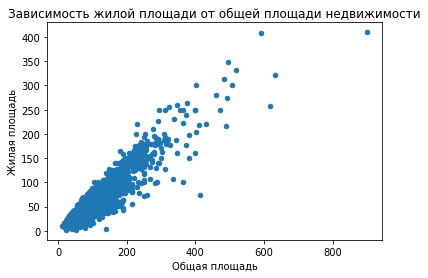

In [ ]:
data.plot(x='total_area', y='living_area', kind='scatter')

plt.title('Зависимость жилой площади от общей площади недвижимости')
plt.xlabel('Общая площадь')
plt.ylabel('Жилая площадь')
data['living_area'].corr(data['total_area']).round(3)

Коэффициент корреляции равен 0.94, т.е. есть очень сильная положительная связь жилой площади и общей площади. <br>
Восстановим данные о жилой площади, заменив пропуски медианами значений для каждого диапазона значений общей площади total_area_group.

In [ ]:
data['total_area_group'] = pd.qcut(data['total_area'],10)
grp3 = data.groupby(['total_area_group'])
data['living_area'] = grp3.living_area.apply(lambda x: x.fillna(x.median()))
count_ratio_null('living_area')

Количество пропущенных значений: 0
Доля пропущенных значений: 0.0%


In [ ]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104942,0.116436,0.099392,0.005719,0.010452,0.104779,0.033342,-0.028117,-0.024607,0.105796,0.117736,-0.002640,-0.047928,0.020981,-0.006209,-0.011132,-0.003631,-0.026581
last_price,0.104942,1.000000,0.653585,0.363119,0.069174,-0.007029,0.561076,0.026590,-0.025082,-0.008801,0.520029,0.030087,-0.026090,-0.206224,0.151668,-0.016633,0.160479,-0.085449,0.081074
total_area,0.116436,0.653585,1.000000,0.758315,0.087152,-0.075958,0.914557,-0.025202,-0.071981,-0.034940,0.609436,0.049880,-0.030082,-0.230920,0.166096,-0.021394,0.163147,-0.099379,0.150173
rooms,0.099392,0.363119,0.758315,1.000000,0.047640,-0.228398,0.839498,-0.151877,-0.145983,-0.087687,0.269626,0.019053,-0.061237,-0.184786,0.138343,-0.054034,0.093327,-0.058989,0.127500
ceiling_height,0.005719,0.069174,0.087152,0.047640,1.000000,-0.015044,0.084087,-0.003784,0.001923,0.019323,0.081980,0.041061,-0.019624,-0.079751,0.058542,-0.020669,0.071789,-0.052267,0.019015
floors_total,0.010452,-0.007029,-0.075958,-0.228398,-0.015044,1.000000,-0.162422,0.677867,0.070180,0.050811,0.163717,0.194449,0.108470,0.019646,-0.252775,0.097527,-0.123230,0.039499,-0.052153
living_area,0.104779,0.561076,0.914557,0.839498,0.084087,-0.162422,1.000000,-0.092922,-0.056786,-0.031149,0.430434,0.022953,-0.053430,-0.230159,0.182474,-0.047758,0.150484,-0.083485,0.144270
floor,0.033342,0.026590,-0.025202,-0.151877,-0.003784,0.677867,-0.092922,1.000000,0.035947,0.036175,0.135140,0.173705,0.073166,0.008759,-0.163848,0.072874,-0.076825,0.026387,-0.038895
studio,-0.028117,-0.025082,-0.071981,-0.145983,0.001923,0.070180,-0.056786,0.035947,1.000000,-0.004208,NaN,0.031183,-0.021646,-0.006790,-0.030811,0.006925,0.000774,0.001845,-0.021607
open_plan,-0.024607,-0.008801,-0.034940,-0.087687,0.019323,0.050811,-0.031149,0.036175,-0.004208,1.000000,NaN,0.019271,-0.013599,-0.004176,-0.010100,0.010692,0.008480,-0.003387,-0.024163


**4. обработка пропусков в столбце is_apartment - апартаменты (булев тип)**

In [ ]:
count_ratio_null('is_apartment')

Количество пропущенных значений: 20838
Доля пропущенных значений: 88.3%


Большинство значений в данном столбце пропущены. Посмотрим какие есть уникальные значения в этом столбце и заменим тип данных на bool.

In [ ]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Т.к. информация о том, что жилье является апартаментами не заполнено, то предположим, что это обычная квартира и заменим пропуска на False

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Т.к. is_apartment указывает либо True, либо False, то заменим тип данных на bool.

In [ ]:
data['is_apartment'] = data['is_apartment'].astype('bool')
data['is_apartment'].dtype

dtype('bool')

In [ ]:
count_ratio_null('is_apartment')

Количество пропущенных значений: 0
Доля пропущенных значений: 0.0%


**5. обработка пропусков в столбце kitchen_area - площадь кухни в квадратных метрах**

In [ ]:
count_ratio_null('kitchen_area')

Количество пропущенных значений: 2231
Доля пропущенных значений: 9.4%


Т.к. в квартирах студиях кухня объединена с комнатой, заменим площадь кухни на 0.

In [ ]:
data.loc[data['studio'] == True, 'kitchen_area'] = 0
count_ratio_null('kitchen_area')

Количество пропущенных значений: 2085
Доля пропущенных значений: 8.8%


Пропуски все еще остались. По аналогии с жилой площадью, проверим зависимость площади кухни от общей площади недвижимости.

0.612

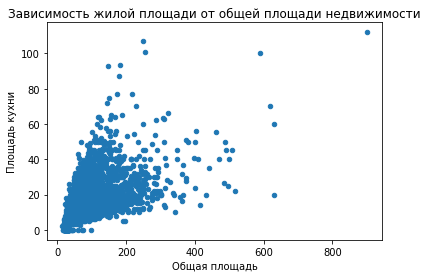

In [ ]:
data.plot(x='total_area', y='kitchen_area', kind='scatter')

plt.title('Зависимость жилой площади от общей площади недвижимости')
plt.xlabel('Общая площадь')
plt.ylabel('Площадь кухни')
data['kitchen_area'].corr(data['total_area']).round(3)

Между площадью кухни и общей площадью есть сильная связь, т.к. коэффцициент корреляции равен 0.6.
Восстановим данные о площади кухни, заменив пропуски медианами значений для каждого диапазона  общей площади total_area_group. После этого проверим еще раз количество пропусков.

In [ ]:
data['kitchen_area'] = grp3.kitchen_area.apply(lambda x: x.fillna(x.median()))
count_ratio_null('kitchen_area')

Количество пропущенных значений: 0
Доля пропущенных значений: 0.0%


**6. обработка пропусков в столбце balcony - число балконов**

In [ ]:
count_ratio_null('balcony') 

Количество пропущенных значений: 11480
Доля пропущенных значений: 48.6%


У почти половины объявлений не заполнен столбец с количеством балконов. Предположим, что его не заполнили из-за того, что их нет. Заменим в таком случае пропуски на 0. 

In [ ]:
data['balcony'] = data['balcony'].fillna(0)
count_ratio_null('balcony') 

Количество пропущенных значений: 0
Доля пропущенных значений: 0.0%


Пропусков больше нет. Заменим теперь тип данных на int, т.к. количество балконов - целое число.

In [ ]:
data['balcony'] = data['balcony'].astype('int')
data['balcony'].dtype

dtype('int64')

**7. обработка пропусков в столбце locality_name - название населенного пункта**

In [ ]:
count_ratio_null('locality_name')

Количество пропущенных значений: 48
Доля пропущенных значений: 0.2%


Эти пропуски мы не сможем восстановить. Можем либо удалить их из данных, или заменить пропуски на значение "нет информации". Чтобы не терять информацию в остальных столбцах заменим на "нет информации".

In [ ]:
data['locality_name'] = data['locality_name'].fillna('нет информации')
count_ratio_null('locality_name')

Количество пропущенных значений: 0
Доля пропущенных значений: 0.0%


**8. обработка пропусков в столбце airports_nearest - расстояние до ближайшего аэропорта в метрах**

In [ ]:
count_ratio_null('airports_nearest')

Количество пропущенных значений: 5532
Доля пропущенных значений: 23.4%


Оставим пропуски без изменений, т.к. они не будут использоваться в рамках исследования

**9. обработка пропусков в столбце cityCenters_nearest - расстояние до центра города в метрах**

In [ ]:
count_ratio_null('cityCenters_nearest')

Количество пропущенных значений: 5509
Доля пропущенных значений: 23.3%


Посмотрим сколько пропусков есть у квартир, находящихся в Санкт-Петербурге и какова их доля.

In [ ]:
print('Количество пропущенных значений:', data.query('locality_name=="Санкт-Петербург"').cityCenters_nearest.isnull().sum())
print('Доля пропущенных значений в Санкт-Петерурге: {:.1%}'.format(data.query('locality_name=="Санкт-Петербург"').cityCenters_nearest.isnull().sum() / len(data.query('locality_name=="Санкт-Петербург"'))))

Количество пропущенных значений: 60
Доля пропущенных значений в Санкт-Петерурге: 0.4%


Из всех квартир Санкт-Петербурга отсутствует информация о расстоянии до центра только для 0,4% квартир. Т.к. эта небольшая доля, то эти пропуски не окажут влияния на результаты исследования стоимости жилья от удаленности от центра. Оставим эти пропуски без изменений.

**10. обработка пропусков в столбце parks_around3000 - число парков в радиусе 3 км**

In [ ]:
count_ratio_null('parks_around3000')

Количество пропущенных значений: 5508
Доля пропущенных значений: 23.3%


Оставим пропуски без изменений, т.к. они не будут использоваться в рамках исследования

**11. обработка пропусков в столбце parks_nearest - расстояние до ближайшего парка в метрах**

In [ ]:
count_ratio_null('parks_nearest')

Количество пропущенных значений: 15567
Доля пропущенных значений: 65.9%


Оставим пропуски без изменений, т.к. они не будут использоваться в рамках исследования

**12. обработка пропусков в столбце ponds_around3000 - число водоёмов в радиусе 3 км**

In [ ]:
count_ratio_null('ponds_around3000')

Количество пропущенных значений: 5508
Доля пропущенных значений: 23.3%


Оставим пропуски без изменений, т.к. они не будут использоваться в рамках исследования

**13. обработка пропусков в столбце ponds_nearest - расстояние до ближайшего водоёма в метрах**

In [ ]:
count_ratio_null('ponds_nearest')

Количество пропущенных значений: 14552
Доля пропущенных значений: 61.6%


Оставим пропуски без изменений, т.к. они не будут использоваться в рамках исследования

**14. обработка пропусков в столбце days_exposition - сколько дней было размещено объявление (от публикации до снятия)**

In [ ]:
count_ratio_null('days_exposition')

Количество пропущенных значений: 3172
Доля пропущенных значений: 13.4%


Откроем матрицу корреляции и посмотрим есть ли зависимость длительности размещения от какого-либо параметра.

In [ ]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104942,0.116436,0.099392,0.005719,0.010452,0.104779,0.033342,0.010422,-0.028117,-0.024607,0.112752,0.047209,-0.002640,-0.047928,0.020981,-0.006209,-0.011132,-0.003631,-0.026581
last_price,0.104942,1.000000,0.653585,0.363119,0.069174,-0.007029,0.561076,0.026590,0.026975,-0.025082,-0.008801,0.458990,0.008606,-0.026090,-0.206224,0.151668,-0.016633,0.160479,-0.085449,0.081074
total_area,0.116436,0.653585,1.000000,0.758315,0.087152,-0.075958,0.914557,-0.025202,0.029705,-0.071981,-0.034940,0.606193,0.010134,-0.030082,-0.230920,0.166096,-0.021394,0.163147,-0.099379,0.150173
rooms,0.099392,0.363119,0.758315,1.000000,0.047640,-0.228398,0.839498,-0.151877,0.000380,-0.145983,-0.087687,0.301260,-0.015737,-0.061237,-0.184786,0.138343,-0.054034,0.093327,-0.058989,0.127500
ceiling_height,0.005719,0.069174,0.087152,0.047640,1.000000,-0.015044,0.084087,-0.003784,0.146387,0.001923,0.019323,0.076520,0.029720,-0.019624,-0.079751,0.058542,-0.020669,0.071789,-0.052267,0.019015
floors_total,0.010452,-0.007029,-0.075958,-0.228398,-0.015044,1.000000,-0.162422,0.677867,-0.026351,0.070180,0.050811,0.135411,0.172943,0.108470,0.019646,-0.252775,0.097527,-0.123230,0.039499,-0.052153
living_area,0.104779,0.561076,0.914557,0.839498,0.084087,-0.162422,1.000000,-0.092922,0.031293,-0.056786,-0.031149,0.444270,-0.009295,-0.053430,-0.230159,0.182474,-0.047758,0.150484,-0.083485,0.144270
floor,0.033342,0.026590,-0.025202,-0.151877,-0.003784,0.677867,-0.092922,1.000000,-0.013205,0.035947,0.036175,0.116492,0.171250,0.073166,0.008759,-0.163848,0.072874,-0.076825,0.026387,-0.038895
is_apartment,0.010422,0.026975,0.029705,0.000380,0.146387,-0.026351,0.031293,-0.013205,1.000000,-0.003634,-0.002457,0.042563,0.032951,0.016531,0.003774,0.020805,-0.033541,0.024038,0.003307,0.015293
studio,-0.028117,-0.025082,-0.071981,-0.145983,0.001923,0.070180,-0.056786,0.035947,-0.003634,1.000000,-0.004208,-0.142470,0.030048,-0.021646,-0.006790,-0.030811,0.006925,0.000774,0.001845,-0.021607


Сильной зависимост не найдено. 
Пропуски могут быть по следующим причинам:
  - владелец жилье уже продал, но забыл снять объявление с публикации
  - владелец передумал продавать жилье, но забыл снять объявление с публикации
  - техническая ошибка при выгрузке

Заменим пропущенные значения медианой. Медиану выбрали, т.к. она менее чувствительна к выбросам.

In [ ]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
count_ratio_null('days_exposition')

Количество пропущенных значений: 0
Доля пропущенных значений: 0.0%


Заменим тип данных на int, т.к. количество дней - целое число.

In [ ]:
data['days_exposition'] = data['days_exposition'].astype('int')
data['days_exposition'].dtype

dtype('int64')

**15. Замена типа данных в столбце first_day_exposition - дата публикации на тип datetime**

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

### Вывод ###
1. Обработали пропущенные значения:
  - Высота потолков: пропущено 38,8% значений. Пропущенные значения заменены на медианы значений для домов соответствующей этажности.
  - Количество этажей: строки, в которых были пропуски в количестве этажей и высоте потолков (0,4%) были удалены.
  - Жилая площадь: пропущено 7,9% значений. Нашли связь жилой площади и общей площади. Разбили общую площадь на 10 диапазонов. Заменили пропуски в жилой площади медианами, подсчитанными для каждого диапазона общей площади.
  - Апартаменты: пропущено 88,3% значений. Пропущенные значения заменили на False, предполагая, что пропуски связаны с тем, что жилье не является апартаментами.
  - Площадь кухни: пропущено 9,4% значений. Нашли связь площади кухни и общей площади. Заменили пропуски медианами, подсчитанными для каждого диапазона общей площади.
  - Количество балконов: пропущено 48,6% значений. Предположили, что пропуски не заполнены из-за того, что балконов в квартире нет. Заменили пропуски на 0.
  - Название населенного пункта: пропущено 0,2% значений. Т.к. пропуски восстановить проблематично и их доля небольшая, заменили пропущенные значения на "нет информации".
  - Расстояние до ближайшего аэропорта, число парков в радиусе 3 км, расстояние до ближайшего парка, число водоемов в радиусе 3 км, расстояние до ближайшего водоема: пропущенные значения в этих столбцах оставлены без изменений, так как они не будут использованы в текущем исследовании.
  - Длительность размещения объявления: пропущено 13,4% значений. Все пропущенные значения были заменены на медиану.
<br>
2. Заменили типы данных:
  - Количество этажей и количество балконов: тип данных заменен на целочисленный int.
  - Апартаменты: тип данных заменен на булев тип bool.
  - Дата публикации: тип данных изменен на datetime.

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

<b>Все отлично!👍:</b> Отличная работа! Очень хорошо структурированная предобработка данных. Все верно!😉
</div>

<a id="3"></a>
### Шаг 3. Посчитайте и добавьте в таблицу

Цена квадратного метра:

In [ ]:
data['price_per_sqm'] = round(data['last_price'] / data['total_area'], 1)

День недели, месяц и год публикации объявления:

In [ ]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Этаж квартиры (первый, последний, другой):

In [ ]:
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
data.loc[data['floor_category'].isnull(), 'floor_category'] = 'другой'

Соотношение жилой и общей площади, а также отношение площади кухни к общей:

In [ ]:
data['living_area_ratio'] = round(data['living_area'] / data['total_area'], 3)
data['kitchen_area_ratio'] = round(data['kitchen_area'] / data['total_area'], 3)

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,total_area_group,price_per_sqm,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,95,"(93.4, 900.0]",120370.4,3,3,2019,другой,0.472,0.231
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,NaN,81,"(37.6, 42.0]",82920.8,1,12,2018,первый,0.460,0.272
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,574.0,558,"(52.0, 58.0]",92785.7,3,8,2015,другой,0.612,0.148
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,69.0,9,False,...,234.0,424,"(93.4, 900.0]",408176.1,4,7,2015,другой,0.434,0.101
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121,"(93.4, 900.0]",100000.0,1,6,2018,другой,0.320,0.410


### Вывод
В таблицу с данными были добавлены:
  - Цена квадратного метра
  - День недели, месяц и год публикации объявления
  - Этаж квартиры (первый, последний, другой)
  - Соотношение жилой и общей площади, а также отношение площади кухни к общей
  

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

<b>Все отлично!👍:</b> Корректное выполнение задачи! Так  держать!
</div>

<a id="4"></a>
### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

**1. Изучим следующие параметры: площадь, цена, число комнат, высота потолков, срок продажи квартиры. Построим гистограммы для каждого параметра.**

Для начала напишем функцию, которая:
  - будет вычислять границы усов: значения 25% перцентили минус 1.5 х МКР и значения 75% перцентили плюс 1.5 х МКР (МКР - межквартальных размах).
  - вычисляет долю выбросов (значений, которые находятся за границами усов)

In [ ]:
def min_max_wrong_ratio(column):
    p_25, p_75 = np.percentile(data[column], [25, 75]) #значения квартилей
    iqr = p_75 - p_25 #межквартальный размах
    upper_bound = round(p_75 + 1.5 * iqr, 2)
    lower_bound  = round(p_25 - 1.5 * iqr, 2)
    if upper_bound > data[column].max():
        upper_bound = data[column].max()
    if lower_bound < data[column].min():
        lower_bound = data[column].min()
    print('Границы усов:', [lower_bound, upper_bound])
    print('Доля выбросов составляет: {:.1%}'.format(len(data.loc[data[column] > upper_bound]) / len(data)))
    print('Медиана: {:.1f}'.format(data[column].median()))
    print('Половина всех значений находится в диапазоне:', [p_25, p_75])

**1.1. Площадь - для начала построим диаграмму boxplot и гистограмму определим наличие выбросов**

In [ ]:
min_max_wrong_ratio('total_area')

Границы усов: [12.0, 114.5]
Доля выбросов составляет: 5.2%
Медиана: 52.0
Половина всех значений находится в диапазоне: [40.0, 69.8]


Построим диаграмму boxplot и гистограмму

(0, 125)

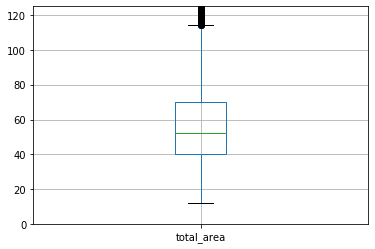

In [ ]:
data.boxplot(column='total_area')
plt.ylim(0, 125)

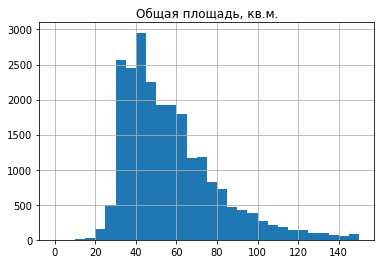

In [ ]:
data.hist('total_area', bins=30, range=(0, 150))
plt.title('Общая площадь, кв.м.')
plt.show()

Добавим столбец с признаком аномально большой площади

In [ ]:
data['wrong_total_area'] = data['total_area'] > 114.5

**Выводы:**
1. Значения площади свыше 114.5 кв.м. являются аномальными, их доля составляет 5.2%
2. Медиана общей площади равна 52 кв.м.
3. Распределение площади похоже Пуассоновское.
4. Половина значений площадей квартир находится в диапазоне от 40.0 до 69.8 кв.м.

**1.2. Цена - построим гистограмму, определим наличие выбросов и их долю**

In [ ]:
min_max_wrong_ratio('last_price')

Границы усов: [12190.0, 11897500.0]
Доля выбросов составляет: 8.7%
Медиана: 4650000.0
Половина всех значений находится в диапазоне: [3400000.0, 6799000.0]


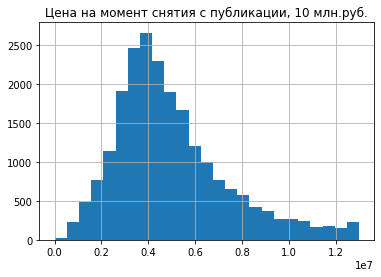

In [ ]:
data.hist('last_price', range=(0,13000000), bins=25)
plt.title('Цена на момент снятия с публикации, 10 млн.руб.')
plt.show()

Добавим столбец с признаком аномальных значений

In [ ]:
data['wrong_last_price'] = (data['last_price'] < 12190.0) | (data['last_price'] > 11897500.0)

**Выводы:**
1. В данных присутствуют выбросы, их доля составляет 8.7%
2. Медиана цены на момент снятия с публикации составляет 4 650 000.0
3. Распределение цены напоминает нормальное.
4. Половина значений цен находится в диапазоне от 3.4 до 6.8 млн. руб.
5. В данных присутствуют очень низкие значения для стоимости квартиры - возможно в этих значениях цены указана в другой валюте (доллар/евро), либо это ошибочно указанная цена.
6. Также в данных присутствуют аномально высокие значения более 11,9 млн. рублей.
7. Добавили столбец с признаком аномальных значений.

**1.3. Число комнат - построим гистограмму, определим наличие выбросов и их долю**

In [ ]:
min_max_wrong_ratio('rooms')

Границы усов: [0, 6.0]
Доля выбросов составляет: 0.4%
Медиана: 2.0
Половина всех значений находится в диапазоне: [1.0, 3.0]


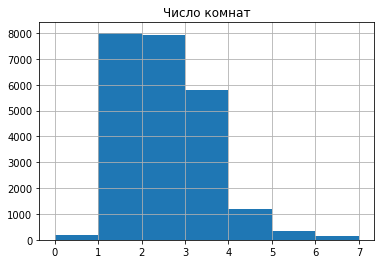

In [ ]:
data.hist('rooms', range=(0,7), bins=7)
plt.title('Число комнат')
plt.show()

In [ ]:
data['rooms'].describe()

count    23612.000000
mean         2.071108
std          1.078386
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

На гистограмме заметны квартиры с количеством комнат равным нулю. Посмотрим какая доля таких квартир с типом "студия".

In [ ]:
print('Доля квартир с количеством комнат равным 0 и типом студия: {:.1%}'.format(data.loc[data['rooms'] == 0, 'studio'].sum() / data.loc[data['rooms'] == 0, 'studio'].count()))

Доля квартир с количеством комнат равным 0 и типом студия: 69.6%


Добавим столбец с признаком аномальных значений

In [ ]:
data['wrong_rooms'] = data['rooms'] > 6.0

**Выводы:**
1. В данных присутствуют выбросы, их доля составляет 0.4%
2. Медиана количества комнат равна 2.
3. Распределение цены напоминает пуассоновское.
4. Половина значений находится в диапазоне от 1 до 3 комнат.
5. В данных присутствует несколько значений с числом комнат равным 0. Почти 70% таких квартир это квартиры-студии. У остальных 0 возможно стоит по ошибке. 
6. Добавили столбец с признаком аномальных значений.

**1.4. Высота потолков - построим гистограмму, определим наличие выбросов и их долю**

In [ ]:
min_max_wrong_ratio('ceiling_height')

Границы усов: [2.25, 3.05]
Доля выбросов составляет: 6.2%
Медиана: 2.6
Половина всех значений находится в диапазоне: [2.55, 2.75]


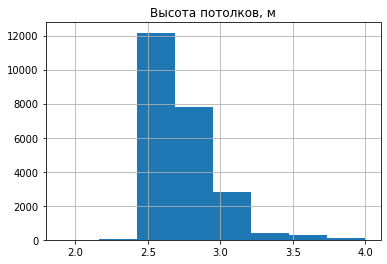

In [ ]:
data.hist('ceiling_height', range=(1.9,4), bins=8)
plt.title('Высота потолков, м')
plt.show()

In [ ]:
data['ceiling_height'].describe()

count    23612.000000
mean         2.735917
std          0.996091
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

Добавим столбец с признаком аномальных значений

In [ ]:
data['wrong_ceiling_height'] = (data['ceiling_height'] < 2.25) | (data['ceiling_height'] > 3.05)

**Выводы:**
1. В данных присутствуют выбросы, их доля составляет 6.2%
2. Медиана высоты потолков равна 2.6 м.
3. Распределение высоты потолков напоминает пуассоновское.
4. Половина значений находится в диапазоне от 2.55 до 2.75 м.
5. В данных присутствует аномальные значения менее 2,25 м или более 3,05 м.
6. Добавили столбец с признаком аномальных значений.

**1.5. Срок публикации - построим гистограмму, определим наличие выбросов и их долю**

In [ ]:
min_max_wrong_ratio('days_exposition')

Границы усов: [1, 430.0]
Доля выбросов составляет: 9.8%
Медиана: 95.0
Половина всех значений находится в диапазоне: [45.0, 199.0]


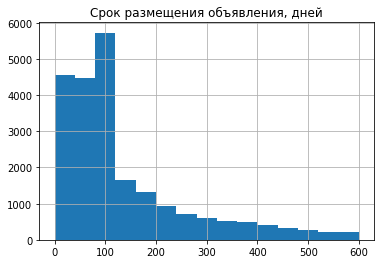

In [ ]:
data.hist('days_exposition', range=(0,600), bins=15)
plt.title('Срок размещения объявления, дней')
plt.show()

Добавим столбцы с признаком срока снятия с публикации:
- слишком долго, если срок снятия больше верхней границы усов
- слишком быстро, если срок снятия меньше месяца

In [ ]:
data['too_slow'] = data['days_exposition'] > 430 #430 - верхняя границы усов
data['too_fast'] = data['days_exposition'] < 30 #30 - 1 месяц

**Выводы:**
1. В данных присутствуют выбросы, их доля составляет 9.8%
2. Медиана срока публикации равна 95 дней.
3. Распределение срока напоминает пуассоновское.
4. Половина значений находится в диапазоне от 45 до 199 дней.
5. В данных присутствует аномальные значения со сроком публикации свыше 430 дней.
6. Добавили столбцы с признаком слишком долгих и слишком быстрых снятий с публикации.

**2. Уберем из таблицы редкие и аномальные значения**

In [ ]:
good_data = data[(data['wrong_total_area'] == False) & 
     (data['wrong_last_price'] == False) &
     (data['wrong_rooms'] == False) &
     (data['wrong_ceiling_height'] == False) &
     (data['too_slow'] == False) &
     (data['too_fast'] == False)].reset_index(drop=True)

print('Доля корректных значений составила: {:.1%}'. format(len(good_data) / len(data)))

Доля корректных значений составила: 65.4%


In [ ]:
#good_data_stat = good_data.pivot_table(index='locality_name', values=['last_price', 'total_area', 'rooms', 'ceiling_height', 'cityCenters_nearest'])

**3. Проверим зависимость цены от площади, числа комнат, удаленность от центра, высоты потолков, этажа, даты размещения**

**3.1 Изучим зависимость цены от различных факторов: площади, числа комнат, удаленности от центра, высоты потолков, этажа, даты публикации (день, месяц, год)**

Изучим зависимость цены от площади, числа комнат, высоты потолков и удаленности от центра - построим матрицу корреляции и найдем значения коэффициентов корреляции

In [ ]:
good_data[['last_price', 'total_area', 'rooms', 'ceiling_height', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,ceiling_height,cityCenters_nearest
last_price,1.000000,0.677993,0.408322,0.295947,-0.312582
total_area,0.677993,1.000000,0.801357,0.170433,-0.081560
rooms,0.408322,0.801357,1.000000,-0.056663,-0.044913
ceiling_height,0.295947,0.170433,-0.056663,1.000000,-0.156212
cityCenters_nearest,-0.312582,-0.081560,-0.044913,-0.156212,1.000000


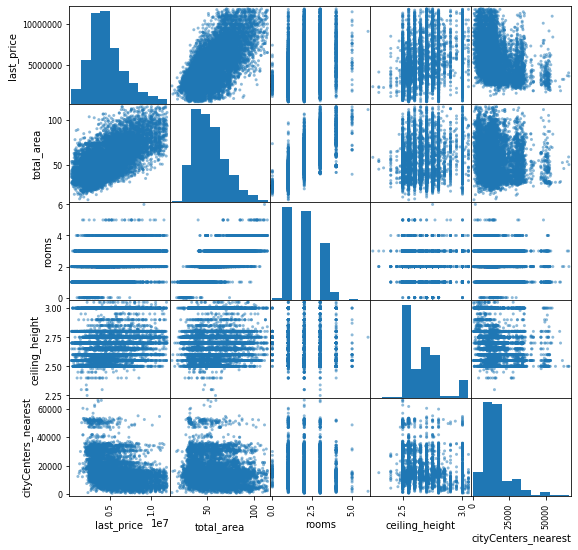

In [ ]:
pd.plotting.scatter_matrix(good_data[['last_price', 'total_area', 'rooms', 'ceiling_height', 'cityCenters_nearest']], figsize=(9, 9))
plt.show()

Построим графики зависимости цены от площади и от удаленности от центра

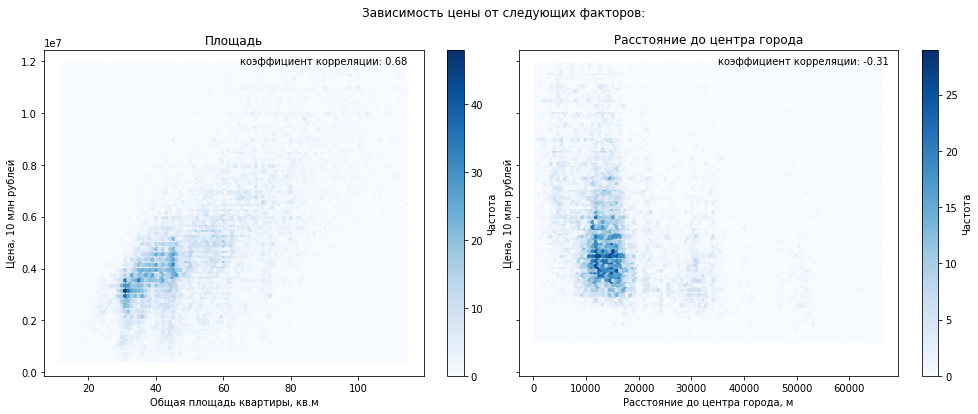

In [ ]:
fig, [ax1, ax2] = plt.subplots(1, 2, sharey=True, figsize=(17, 6), gridspec_kw={'wspace': 0})
fig.suptitle('Зависимость цены от следующих факторов:')

ax1.set_title('Площадь')
ax1.set_ylabel('Цена, 10 млн рублей')
ax1.set_xlabel('Общая площадь квартиры, кв.м')
ax1.text(65, 11897500, 
         'коэффициент корреляции: ' + str(round(good_data['last_price'].corr(good_data['total_area']), 2))) 

hb1 = ax1.hexbin(good_data['total_area'], good_data['last_price'], cmap='Blues')
cb1 = fig.colorbar(hb1, ax=ax1)
cb1.set_label('Частота')

ax2.set_title('Расстояние до центра города')
ax2.set_ylabel('Цена, 10 млн рублей')
ax2.set_xlabel('Расстояние до центра города, м')
ax2.text(35000, 11897500, 
         'коэффициент корреляции: ' + str(round(good_data['last_price'].corr(good_data['cityCenters_nearest']), 2))) 

hb2 = ax2.hexbin(good_data['cityCenters_nearest'], good_data['last_price'], cmap='Blues')
cb2 = fig.colorbar(hb2, ax=ax2)
cb2.set_label('Частота')
plt.show()

Изучим зависимость цены от числа комнат, этажа квартиры и времени публикации объявления

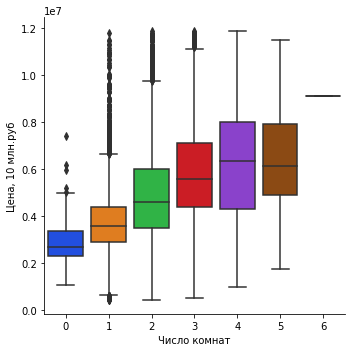

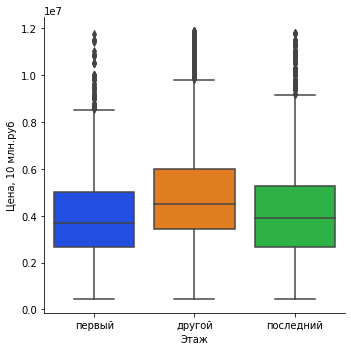

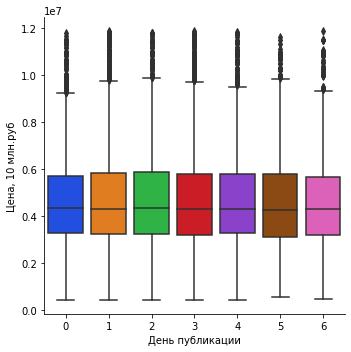

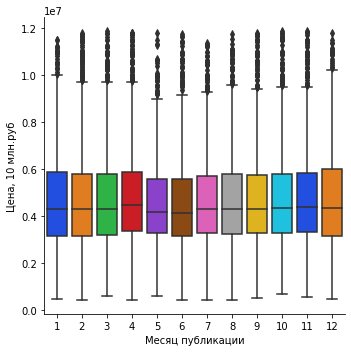

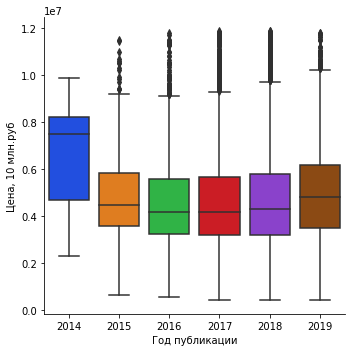

In [ ]:
for column in ['rooms', 'floor_category', 'weekday', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=good_data, palette='bright')
#    plt.xlabel('Общая площадь')
    plt.ylabel('Цена, 10 млн.руб')
    if column == 'rooms':
        plt.xlabel('Число комнат')
    if column == 'floor_category':
        plt.xlabel('Этаж')
    if column == 'weekday':
        plt.xlabel('День публикации') 
    if column == 'month':
        plt.xlabel('Месяц публикации')
    if column == 'year':
        plt.xlabel('Год публикации')

**Вывод:**
  - Наиболее сильная корреляция наблюдается между площадью квартиры и ее стоимостью (коэффицент корреляции 0,68).
  - Расстояние до центра города также влияет на стоимость квартиры, но обратно пропорционально и не так сильно (коэффициент корреляции -0,31).
  - Цена квартиры также зависит от числа комнат: чем их больше, тем квартира дороже. Но это верно, пока число комнат не превышает четырех: 5-ти или 6-ти комнатные квартиры могут быть проданы дешевле 4-х комнатных. Возможно такие квартиры не пользуются спросом.
  - Квартиры на первом или последнем этаже обычно продаются по более низкой цене, чем квартиры на других этажах.
  - День недели и месяц публикации объявления не оказывают особого влияния на цену. Однакоо видно, что в 2014 г. квартиры продавались по более высоким ценам.

**3.2 Изучим 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья**

Выведем 10 населенных пунктов с наибольших числов объявлений и найдем среднюю цену квадратного метра в этих населенных пунктах

In [ ]:
median_price_per_sqm = good_data.pivot_table(index='locality_name', values='price_per_sqm', aggfunc=['count', 'median'])
median_price_per_sqm.columns = ['count', 'median']
median_price_per_sqm.sort_values('count', ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,9410,102156.35
посёлок Мурино,364,85714.30
посёлок Шушары,337,76584.50
Всеволожск,313,65853.70
посёлок Парголово,251,91328.40
Пушкин,250,98454.75
Колпино,237,74324.30
Гатчина,230,67180.70
деревня Кудрово,212,92225.05


**Вывод:** Из 10 населенных пунктов с наибольшим числом объявлений лидеры по средней цене квадратного метра: Санкт-Петербург, Пушкин, деревня Кудрово и поселок Парголово. <br>
Дешевле всего квартиры в Выборге, Всеволожске и Гатчине

**4. Изучим квартиры с Санкт-Петербурге: выясним, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он будет показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.**

In [ ]:
good_data['citycenters_km'] = round(good_data['cityCenters_nearest'] / 1000, 0)
good_data['citycenters_km'] = good_data['citycenters_km'].astype('int', errors='ignore')
good_data.loc[(good_data['locality_name'] == 'Санкт-Петербург') & (good_data['citycenters_km'].notna()), 'citycenters_km'].apply(round)
spb_data = good_data.query('locality_name == "Санкт-Петербург"')
spb_center_nearest = spb_data.pivot_table(index='citycenters_km', values=['price_per_sqm', 'last_price'], aggfunc='mean')
spb_center_nearest.head()

,last_price,price_per_sqm
citycenters_km,,
0.0,6.100000e+06,126560.650000
1.0,7.766083e+06,117475.133333
2.0,7.788164e+06,117013.876712
3.0,7.355522e+06,111655.206957
4.0,7.218725e+06,117872.837327


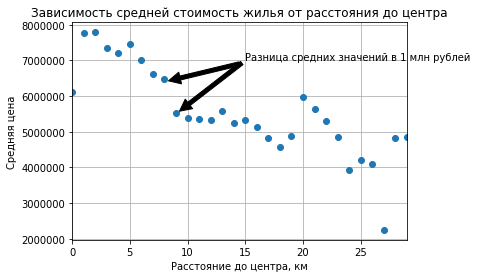

In [ ]:
spb_center_nearest.plot(y='last_price', style='o', grid=True, legend=False)
plt.title('Зависимость средней стоимость жилья от расстояния до центра')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя цена')
plt.annotate('Разница средних значений в 1 млн рублей', xy=(8, 6400000), xytext=(15, 7000000),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('', xy=(9, 5500000), xytext=(15, 7000000),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid(axis='both', alpha=.999)
plt.show()

На графике на 8 км видно резкое понижение стоимости жилья. Таким образом центром Санкт-Петербурга будем считать жилье, находящееся в окружности с радиусом 8 км. <br>

**5. Выделим сегмент квартир в центре и проанализируйте эту территорию. Изучим следующие параметры: площадь, цена, число комнат, высота потолков. И сравним их с параметрами по всем объявлениям**

In [ ]:
spb_center = good_data[(good_data['citycenters_km'] <= 8) & (good_data['locality_name'] == 'Санкт-Петербург')]

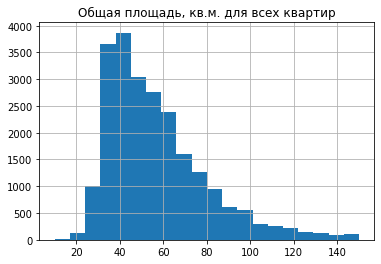

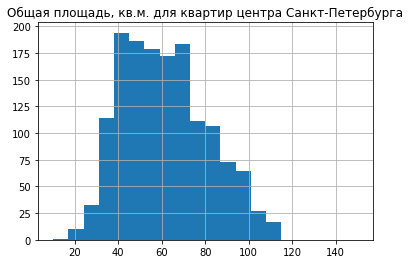

In [ ]:
data.hist('total_area', bins=20, range=(10, 150))
plt.title('Общая площадь, кв.м. для всех квартир')
plt.show()
spb_center.hist('total_area', bins=20, range=(10, 150))
plt.title('Общая площадь, кв.м. для квартир центра Санкт-Петербурга')
plt.show()

В центре Санкт-Петербурга чаще встречаются квартиры с большой площадью, чем в целом среди всех объявлений.

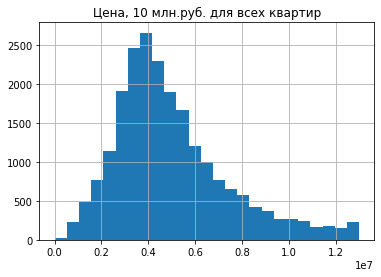

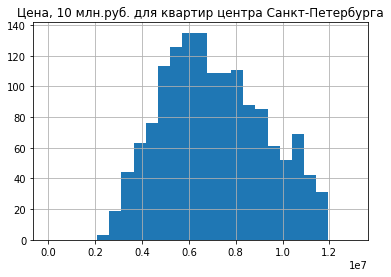

In [ ]:
data.hist('last_price', range=(0,13000000), bins=25)
plt.title('Цена, 10 млн.руб. для всех квартир')
plt.show()
spb_center.hist('last_price', range=(0,13000000), bins=25)
plt.title('Цена, 10 млн.руб. для квартир центра Санкт-Петербурга')
plt.show()

Квартиры в центре Санкт-Петербурга как правило дороже, чем в целом среди всех объявлений.

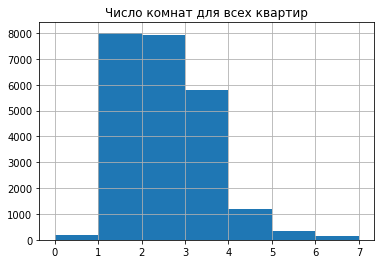

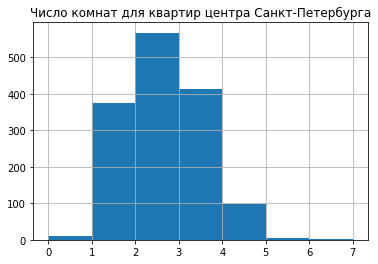

In [ ]:
data.hist('rooms', range=(0,7), bins=7)
plt.title('Число комнат для всех квартир')
plt.show()
spb_center.hist('rooms', range=(0,7), bins=7)
plt.title('Число комнат для квартир центра Санкт-Петербурга')
plt.show()

2-х комнатные квартиры в Санкт-Петерурге выставляются на продаже чаще.

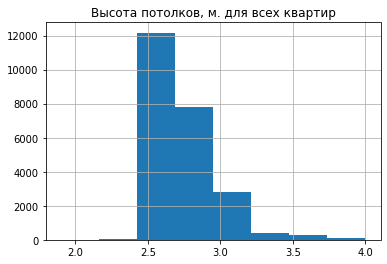

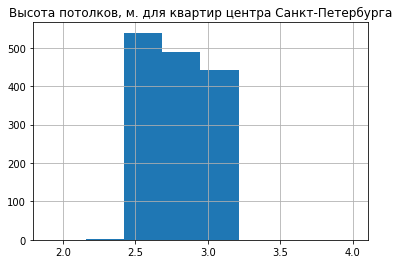

In [ ]:
data.hist('ceiling_height', range=(1.9,4), bins=8)
plt.title('Высота потолков, м. для всех квартир')
plt.show()
spb_center.hist('ceiling_height', range=(1.9,4), bins=8)
plt.title('Высота потолков, м. для квартир центра Санкт-Петербурга')
plt.show()

В Санкт-Петербурге чаще встречаются квартиры с более высокими потолками, чем в целом среди всех объявлений.

In [ ]:
spb_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].median()

total_area             59.60
last_price        6850000.00
rooms                   2.00
ceiling_height          2.75
dtype: float64

Типичная квартира, выставленная на продажу в центре Санкт-Петербурга, имеет следующие характеристики: это 2-комнатная квартира площадью 59,6 кв. м с потолками 2,75 м, по цене 6,85 млн рублей.

**6. Изучим зависимость цены квартир в центре Санкт-Петербурга от следующих факторов: Площадь, удаленность от центра, число комнат, этаж, дата публикации (день, месяц, год)**

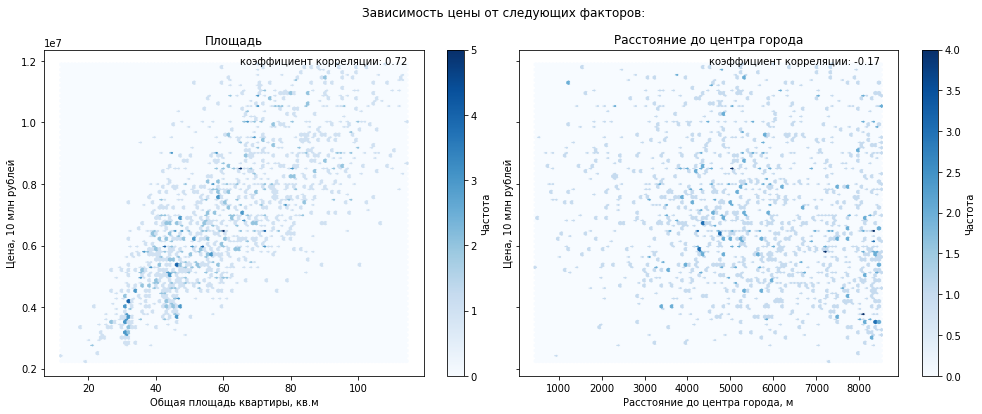

In [ ]:
fig, [ax1, ax2] = plt.subplots(1, 2, sharey=True, figsize=(17, 6), gridspec_kw={'wspace': 0})
fig.suptitle('Зависимость цены от следующих факторов:')

ax1.set_title('Площадь')
ax1.set_ylabel('Цена, 10 млн рублей')
ax1.set_xlabel('Общая площадь квартиры, кв.м')
ax1.text(65, 11897500, 
         'коэффициент корреляции: ' + str(round(spb_center['last_price'].corr(spb_center['total_area']), 2))) 

hb1 = ax1.hexbin(spb_center['total_area'], spb_center['last_price'], cmap='Blues')
cb1 = fig.colorbar(hb1, ax=ax1)
cb1.set_label('Частота')

ax2.set_title('Расстояние до центра города')
ax2.set_ylabel('Цена, 10 млн рублей')
ax2.set_xlabel('Расстояние до центра города, м')
ax2.text(4500, 11897500, 
         'коэффициент корреляции: ' + str(round(spb_center['last_price'].corr(spb_center['cityCenters_nearest']), 2))) 

hb2 = ax2.hexbin(spb_center['cityCenters_nearest'], spb_center['last_price'], cmap='Blues')
cb2 = fig.colorbar(hb2, ax=ax2)
cb2.set_label('Частота')
plt.show()

Изучим зависимость цены от числа комнат, этажа квартиры и времени публикации объявления

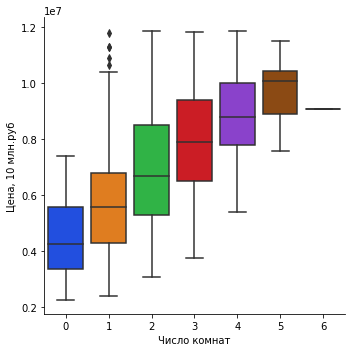

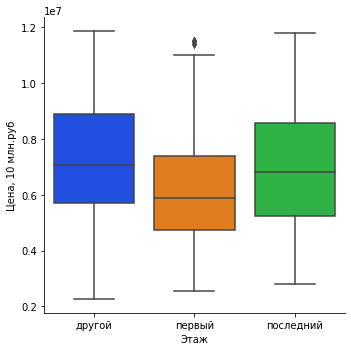

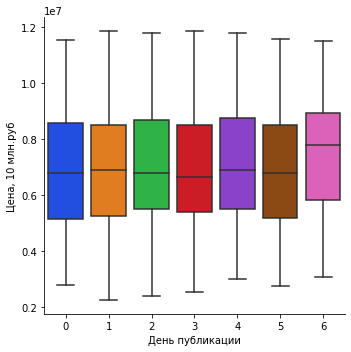

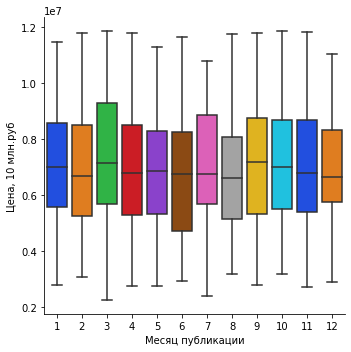

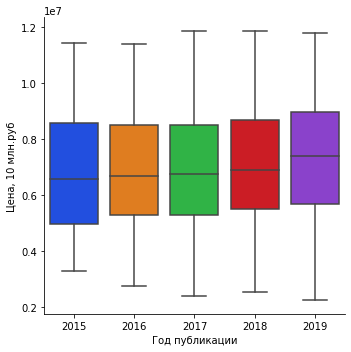

In [ ]:
for column in ['rooms', 'floor_category', 'weekday', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=spb_center, palette='bright')
#    plt.xlabel('Общая площадь')
    plt.ylabel('Цена, 10 млн.руб')
    if column == 'rooms':
        plt.xlabel('Число комнат')
    if column == 'floor_category':
        plt.xlabel('Этаж')
    if column == 'weekday':
        plt.xlabel('День публикации') 
    if column == 'month':
        plt.xlabel('Месяц публикации')
    if column == 'year':
        plt.xlabel('Год публикации')

**Вывод:**
  - У квартир в центре Санкт-Петербурга наблюдается более сильная связь (коэффициент корреляции 0.72) с общей площадью квартиры.
  - Связь с расстоянием от центра стала слабее, но все равно есть. Чем дальше от центра города, тем в среднем квартира будет стоить дешевле.
  - Зависимость стоимости квартиры от числа комнат в центре Санкт-Петербурга сильнее: т.е. если по всем объявлениям 5-комнатные квартиры могли продаваться дешевле 4-х комнатных, то в центре Санкт-Петербурга цена растет в ростом числа комнат даже в случае с 5-комнатными квартирами.
  - Кроме того, в центре города наблюдается явно выраженная зависимость от этажа квартиры: квартира на последнем этаже в среднем будет стоить дороже, чем на первом. Это не наблюдается в явном виде в окрестностях центра.
  - Квартиры по воскресеньям продаются в среднем дороже чем в остальные дни. То же верно и для объявлений, опубликованных в начале весны и начале осени (в марте и сентябре соответственно) в период 2015-2019 гг.: в среднем такие квартиры продавались дороже.

<a id="5"></a>
### Шаг 5. Общий вывод

В рамках исследования объявлений о продаже квартир:
1. Прочитали файл с данными и изучили общую информацию:
 - Данные - 23699 объявлений о продаже квартир.
 - В некоторых столбцах были выявлены пропущенные значения.
2. Обработали пропущенные значения:
 - для некоторых пропущенных значений предположили логическую замену и восстановили информацию;
 - для некоторых - оставили как есть, т.к. не применялись в рамках исследования и логической замены пропускам не нашлось.
3. Добавили в таблицу новые столбца: цена квадратного метра, день недели, месяц, год публикации объявления, этаж квартиры (первый, последний, другой), соотношение жилой площади к общей площади и площади кухни к общей.
4. Изучили различные параметры, влиящие на цену квартиры и выделили следующие:
 - общая площадь квартиры (аномальные значения: более 114,25 кв. м). Чем больше площадь, тем выше цена квартиры
 - расстояние до центра города (центр города огранчен окружностью радиусом 8 км)
 - число комнат и этаж квартиры (чем ближе к центру, тем эти факторы весомее)
 - срок продажи квартиры (слишком быстрая продажа — до 1 месяца, слишком долгая продажа — более 430 дней).
 - кроме того, необходимо ввести ограничения на ввод данных о высоте потолков: допущено множество ошибок (27 м вместо 2,7 м, потолки менее 2 м и т.д.).

### <font color='blue'>Общий вывод по проекту</font>
Поздравляю с окончанием проекта! Перед тобой стояла сложная задача, но тебе удалось справиться с ней на отлично! Твой проект принят, и ты можешь перейти к следующему спринту!
Отмечу некоторые моменты проекта дополнительно🙂:
* Хотелось бы отметить аккуратность ведения кода: очень здорово, что ты уделил время оформлению своей работы, твой код приятно читать и проверять!
* Также ты просто замечательно оформил свой проект: представил общий план, сопровождал шаги промежуточными и итоговыми выводами, это правильная практика, придерживайся ее и дальше!
* Отдельный плюс - это автоматизация решений некоторых разделов проекта. У тебя получились очень эффективные решения с помощью циклов и ветвлений, а также отдельных функций. Также здорово, что ты автоматизировал визуализацию графиков.
* В ходе работы с данными ты применила самые разные методы: groupby(), qcut(), query(), различные типы графиков и аннотации к ним: очень здорово, что ты владеешь этими методами и умеешь применять их на практике. 
* Лучше не оставлять закомментированный код, очень важно, чтобы твои коллеги и внешние наблюдатели могли проследовать за твоими действиями и воспроизвести их.
* Иногда в работе с аномальными значениями стоит руководствоваться не только статистическими параметрами и показателями, но и здравым смыслом, нашими знаниями о реальном мире и фактах! Важно искать и пробовать самые разные пути работы с аномальными и выбивающимися значениями, и, конечно, учитывать их, когда мы работаем с статистическими методами, который могут быть чувствительны к выбросам.